In [ ]:
pip install snscrape


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New section

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving climate_tweets.json to climate_tweets (1).json


In [ ]:
correct_file='climate_tweets (1).json'
import json
import pandas as pd
#list to store the tweets is created here
tweets = []
# this function is used in  with r for reading in
# then the encoding for the emojis and the final file is declared as f
with open(correct_file, 'r', encoding='utf-8') as f:
    for line in f: #for loop with line in the f is created
        try:# try block is used in as used in exception handling
            tweet = json.loads(line)#tweet is decalared loads in from the line
            if 'date' in tweet and 'content' in tweet:
                tweets.append({'date': tweet['date'], 'content': tweet['content']})
        except json.JSONDecodeError:
            continue
# under the list of tweets dictionary of the date and content is created for the labeling of data
# under the if condition
df = pd.DataFrame(tweets)
print("Loaded rows:", len(df))
df.head()



Loaded rows: 500


,date,content
0,2024-03-25T00:00:00,Change change energy planet global.
1,2024-06-21T00:00:00,Global global green green emissions emissions ...
2,2024-04-27T00:00:00,Carbon change temperature carbon change change.
3,2024-06-16T00:00:00,Change temperature climate carbon global earth...
4,2024-03-05T00:00:00,Energy temperature earth earth emissions.


In [ ]:
with open('climate_tweets.json', 'r', encoding='utf-8') as f:
    print(f.readline())



{"date": "2024-03-25T00:00:00", "user": "johnsonjoshua", "content": "Change change energy planet global."}



In [ ]:
import os
os.listdir()


['.config', 'climate_tweets (1).json', 'climate_tweets.json', 'sample_data']

In [ ]:
import re


def clean_text(text):
  text=re.sub(r"https\S+","",text)# this is used to clean urls
  text=re.sub(r"[^a-zA-Z\s]","",text)# to make all of them small case
  text=text.lower()
  return text
df['cleaned']=df['content'].apply(clean_text)
df[['content','cleaned']].head()

,content,cleaned
0,Change change energy planet global.,change change energy planet global
1,Global global green green emissions emissions ...,global global green green emissions emissions ...
2,Carbon change temperature carbon change change.,carbon change temperature carbon change change
3,Change temperature climate carbon global earth...,change temperature climate carbon global earth...
4,Energy temperature earth earth emissions.,energy temperature earth earth emissions


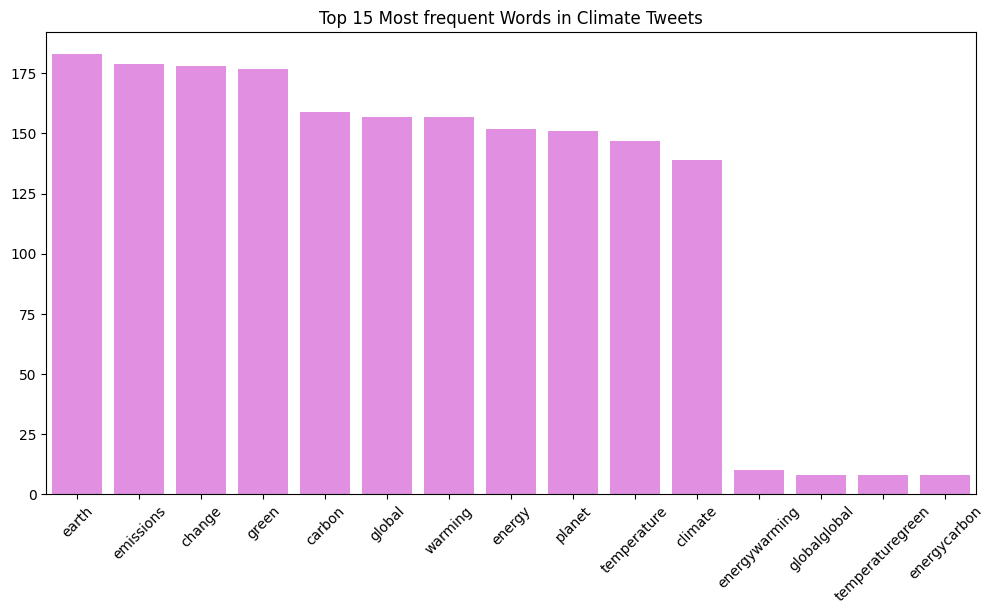

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
#Tokenize
all_words="".join(df['cleaned']).split()
word_freq=Counter(all_words)
common_words=word_freq.most_common(15)
#plot
words, freqs=zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words),y=list(freqs),color='violet')
plt.xticks(rotation=45)
plt.title("Top 15 Most frequent Words in Climate Tweets")
plt.show()

In [ ]:
!pip install wordcloud

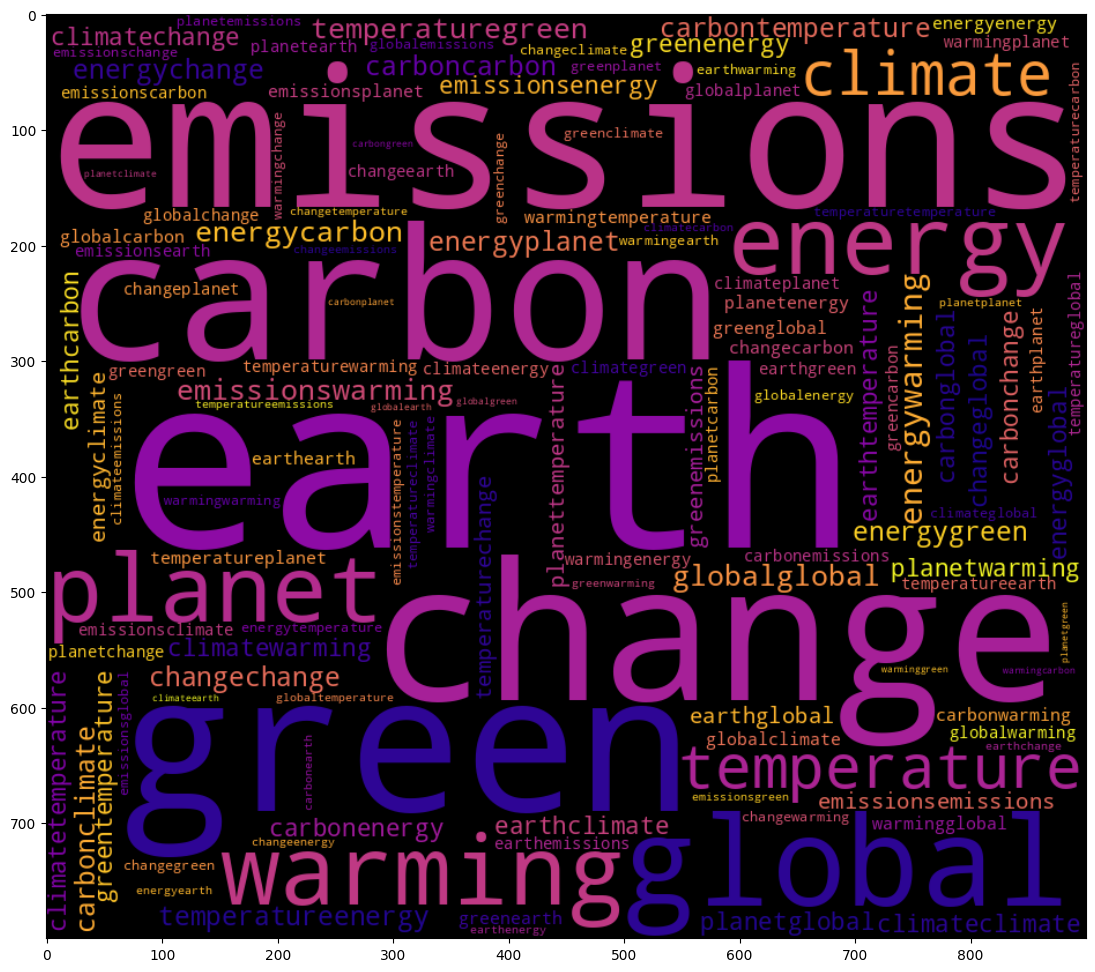

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text="".join(df['cleaned'])#the data frame is wholly merged into a one string for the further analysis
wordcloud=WordCloud(height=800,width=900,colormap='plasma',background_color='black').generate(text)

#plot
plt.figure(figsize=(24,12))
plt.imshow(wordcloud,interpolation='bilinear')#interpolation is used to smoothen the image in
plt.show()

In [ ]:
df['tweet_length']=df['cleaned'].apply(len)
df[['cleaned','tweet_length']].head()

,cleaned,tweet_length
0,change change energy planet global,34
1,global global green green emissions emissions ...,52
2,carbon change temperature carbon change change,46
3,change temperature climate carbon global earth...,53
4,energy temperature earth earth emissions,40


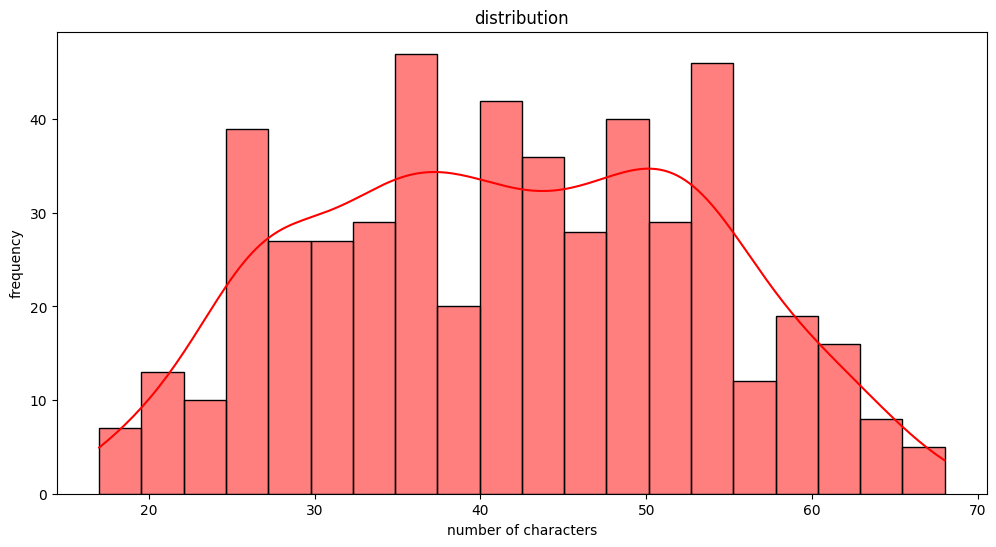

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))
sns.histplot(df['tweet_length'],bins=20,kde=True,color='red')#kde is used to smooth the curve
plt.xlabel('number of characters')
plt.ylabel('frequency')
plt.title('distribution')
plt.show()


In [ ]:
df['word_count']=df['cleaned'].apply(lambda x: len(x.split()))
df[['cleaned','word_count']].head()

,cleaned,word_count
0,change change energy planet global,5
1,global global green green emissions emissions ...,7
2,carbon change temperature carbon change change,6
3,change temperature climate carbon global earth...,7
4,energy temperature earth earth emissions,5


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
def remove_words(text):
    words=text.split()
    filtered = [word for word in words if word not in stop_words]
    return " ".join(filtered)

df['no_stopwords']=df['cleaned'].apply(remove_words)
df[['cleaned','no_stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,cleaned,no_stopwords
0,change change energy planet global,change change energy planet global
1,global global green green emissions emissions ...,global global green green emissions emissions ...
2,carbon change temperature carbon change change,carbon change temperature carbon change change
3,change temperature climate carbon global earth...,change temperature climate carbon global earth...
4,energy temperature earth earth emissions,energy temperature earth earth emissions


In [ ]:
df['cleaned'].head(5)

,cleaned
0,change change energy planet global
1,global global green green emissions emissions ...
2,carbon change temperature carbon change change
3,change temperature climate carbon global earth...
4,energy temperature earth earth emissions


In [ ]:
import numpy as np
df['label'] = np.nan
df.head()

,date,content,cleaned,tweet_length,word_count,no_stopwords,label
0,2024-03-25T00:00:00,Change change energy planet global.,change change energy planet global,34,5,change change energy planet global,NaN
1,2024-06-21T00:00:00,Global global green green emissions emissions ...,global global green green emissions emissions ...,52,7,global global green green emissions emissions ...,NaN
2,2024-04-27T00:00:00,Carbon change temperature carbon change change.,carbon change temperature carbon change change,46,6,carbon change temperature carbon change change,NaN
3,2024-06-16T00:00:00,Change temperature climate carbon global earth...,change temperature climate carbon global earth...,53,7,change temperature climate carbon global earth...,NaN
4,2024-03-05T00:00:00,Energy temperature earth earth emissions.,energy temperature earth earth emissions,40,5,energy temperature earth earth emissions,NaN


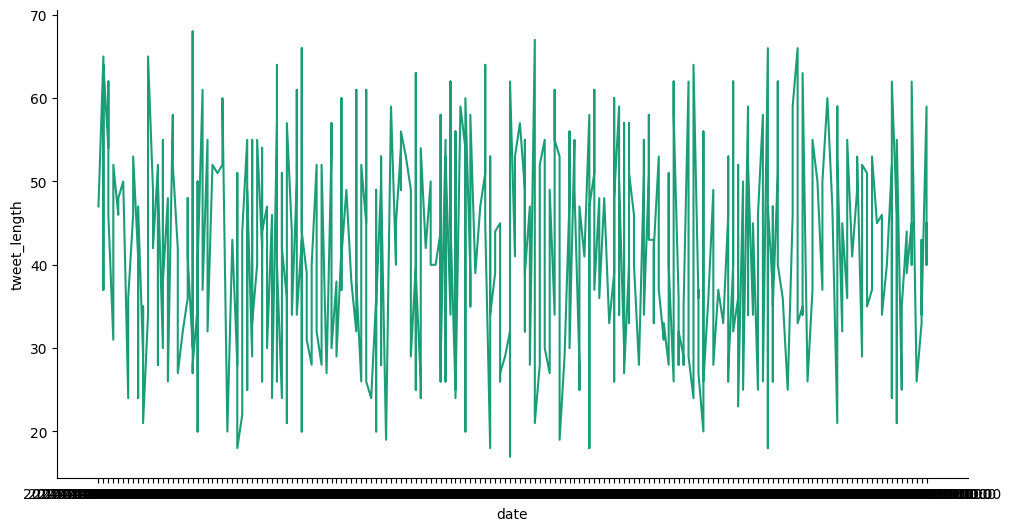

In [ ]:
# @title date vs tweet_length

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['tweet_length']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('tweet_length')

In [ ]:
!pip install feedparser


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.0 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=5b0cf9dd36453b5cec4336936d247460910441b21e9f0d9e9d097255a066bfb6
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k


In [ ]:
import feedparser
from urllib.parse import quote

# Properly encode the query
search_query = quote("climate change")

# Fetch from arXiv
url = f"http://export.arxiv.org/api/query?search_query=all:{search_query}&start=0&max_results=20"
feed = feedparser.parse(url)

# Display results
for entry in feed.entries:
    print("🔹 Title:", entry.title)
    print("📄 Summary:", entry.summary)
    print("📅 Published:", entry.published)
    print("🔗 Link:", entry.link)
    print("-" * 80)


🔹 Title: The structure of the climate debate
📄 Summary: First-best climate policy is a uniform carbon tax which gradually rises over
time. Civil servants have complicated climate policy to expand bureaucracies,
politicians to create rents. Environmentalists have exaggerated climate change
to gain influence, other activists have joined the climate bandwagon. Opponents
to climate policy have attacked the weaknesses in climate research. The climate
debate is convoluted and polarized as a result, and climate policy complex.
Climate policy should become easier and more rational as the Paris Agreement
has shifted climate policy back towards national governments. Changing
political priorities, austerity, and a maturing bureaucracy should lead to a
more constructive climate debate.
📅 Published: 2016-08-19T13:36:55Z
🔗 Link: http://arxiv.org/abs/1608.05597v1
--------------------------------------------------------------------------------
🔹 Title: Climate Science and Control Engineering: Insights

In [ ]:
import requests

guardian_api_key = "bfa377bd-8c5a-4b1b-ada8-b4ac8e6055ca"
url = f"https://content.guardianapis.com/search?q=climate+change&api-key={guardian_api_key}&show-fields=body&page-size=20"

response = requests.get(url)
data = response.json()

guardian_articles = []

# Safely extract data
if 'response' in data and 'results' in data['response']:
    for result in data['response']['results']:
        title = result.get('webTitle', '')
        content = result.get('fields', {}).get('body', '')
        guardian_articles.append({
            "title": title,
            "text": content,
            "source": "news"
        })
    print(f"✅ Fetched {len(guardian_articles)} news articles")
else:
    print("❌ API did not return expected structure.")
    print(data)


✅ Fetched 20 news articles


In [ ]:
import feedparser
from urllib.parse import quote

search_query = quote("climate change")
arxiv_url = f"http://export.arxiv.org/api/query?search_query=all:{search_query}&start=0&max_results=20"
feed = feedparser.parse(arxiv_url)

arxiv_articles = []

for entry in feed.entries:
    arxiv_articles.append({
        "title": entry.title,
        "text": entry.summary,
        "source": "science"
    })


In [ ]:
import pandas as pd

# Combine
all_articles = guardian_articles + arxiv_articles

# Convert to DataFrame
df = pd.DataFrame(all_articles)

# Save to CSV
df.to_csv("climate_misinfo_data.csv", index=False)
print("✅ Dataset saved as climate_misinfo_data.csv")

# Optional: Preview
df.head()


✅ Dataset saved as climate_misinfo_data.csv


,title,text,source
0,Climate change is killing fireflies – threaten...,"<p>Max Vogel, a 29-year-old public defense att...",news
1,Chemical pollution a threat comparable to clim...,<p>Chemical pollution is “a threat to the thri...,news
2,Robin McKie gave prescient warnings about clim...,<p>Robin McKie’s account of his 40&nbsp;years ...,news
3,Why Australia’s most prominent climate change ...,<p>The only regular meeting of Australia’s Sal...,news
4,Helm by Sarah Hall review – a mighty epic of c...,<p>Even if Sarah Hall did not begin her acknow...,news


In [ ]:
print(df["source"].value_counts())
print(df)

source
news       20
science    20
Name: count, dtype: int64
                                                title  \
0   Climate change is killing fireflies – threaten...   
1   Chemical pollution a threat comparable to clim...   
2   Robin McKie gave prescient warnings about clim...   
3   Why Australia’s most prominent climate change ...   
4   Helm by Sarah Hall review – a mighty epic of c...   
5   Climate change target of 2C is ‘dead’, says re...   
6   Flavour of gin and tonic could be impacted by ...   
7   Dying satellites can drive climate change and ...   
8   Climate change could bring insect-borne tropic...   
9   Hurricane-hit Grenadians see climate change an...   
10  ‘Like touching climate change’: glaciers revea...   
11  Arctic plant study reveals an ‘early warning s...   
12  Uninsurable and unaffordable: climate change a...   
13  Can an AI chatbot of Dr Karl change climate sc...   
14  Could a new wave of urgent theatre hold the ke...   
15  Madeleine Watts: ‘Clima

In [ ]:
import pandas as pd
import os

# --- Settings ---
# The name of the CSV file you created.
CSV_FILE = "climate_misinfo_data.csv"


# --- Main Script ---
def explore_data():
    """
    Loads and explores the climate misinformation dataset.
    """
    # Check if the file exists before we try to load it.
    if not os.path.exists(CSV_FILE):
        print(f"❌ Error: The file '{CSV_FILE}' was not found.")
        print("Please make sure the CSV file is in the same directory as this script.")
        return

    print(f"✅ Found file '{CSV_FILE}'. Loading into pandas DataFrame...")
    df = pd.read_csv(CSV_FILE)

    print("\n--- 1. Basic Information ---")
    # .info() gives us a great overview: number of entries, column names, data types, and memory usage.
    df.info()

    print("\n--- 2. First 5 Rows ---")
    # .head() is perfect for a quick peek at the first few rows of your data.
    print(df.head())

    # From your first script, I'm guessing you might have columns like 'title' and 'body' or 'content'.
    # Replace 'body' with the actual name of your main text column if it's different.
    text_column_name = None
    possible_names = ['body', 'content', 'text', 'article']
    for name in possible_names:
        if name in df.columns:
            text_column_name = name
            break

    if text_column_name:
        print(f"\n--- 3. Example of a Full Article Text (from the column '{text_column_name}') ---")
        # .iloc[0] gets the very first row. We then select the text column to see a full example.
        # This helps us understand the structure of the text we'll be analyzing.
        # We use .fillna('') to avoid errors if the cell is empty.
        print(df[text_column_name].fillna('').iloc[0])
    else:
        print("\n--- 3. Could not find a main text column. ---")
        print(f"Searched for {possible_names}. Please check your CSV file.")


if __name__ == "__main__":
    explore_data()

✅ Found file 'climate_misinfo_data.csv'. Loading into pandas DataFrame...

--- 1. Basic Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   40 non-null     object
 1   text    40 non-null     object
 2   source  40 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB

--- 2. First 5 Rows ---
                                               title  \
0  Climate change is killing fireflies – threaten...   
1  Chemical pollution a threat comparable to clim...   
2  Robin McKie gave prescient warnings about clim...   
3  Why Australia’s most prominent climate change ...   
4  Helm by Sarah Hall review – a mighty epic of c...   

                                                text source  
0  <p>Max Vogel, a 29-year-old public defense att...   news  
1  <p>Chemical pollution is “a threat to the thri...   news  
2  <p>Robin McKie’s accoun